**TODO comments**

In [1]:
import pandas as pd
import numpy as np
import pycountry
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from nltk import wordpunct_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import defaultdict

In [2]:
emails = pd.read_csv('hillary-clinton-emails/sentimentEmails.csv')
emails.head()

,Sentiment,SemiProcessedData,ProcessedData
0,0.0000,H : LATEST : SYRIA AIDING QADDAFI ... SID B6 T...,h : latest : syria aid qaddafi ... sid b6 thur...
1,0.3612,CHRIS STEVENS Thx,chris stevens thx
2,0.0000,H : LATEST : SYRIA AIDING QADDAFI ... SID H < ...,h : latest : syria aid qaddafi ... sid h < hro...
3,-0.9191,RIGHT - WING EXTREMIST BEHIND ANTI - MUSLIM FI...,right - wing extremist behind anti - muslim fi...
4,0.0000,H : LATEST : SYRIA AIDING QADDAFI ... SID H < ...,h : latest : syria aid qaddafi ... sid h < hro...


In [3]:
lm = WordNetLemmatizer()
occurencies = defaultdict(list)

for email_id in range(0,emails.shape[0]):
    subject = emails.SemiProcessedData[email_id]
    if not type(subject) == float:
        body = subject.lower()
    
    # Loop over countries.
    for country in list(pycountry.countries):
        counter = 0
        try:
            counter += subject.count(' '+country.alpha_2+' ')
        except:
            pass
        try: 
            counter += subject.count(' '+country.alpha_3+' ')
        except:
            pass
        try:
            counter += body.count(' '+country.name.lower()+' ')
        except:
            pass
        try: 
            counter += body.count(' '+country.common_name.lower()+' ')
        except:
            pass
        occurencies[country.name].append(counter)
        
    if email_id%100 == 0:
        print(email_id)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400


In [4]:
for country in list(pycountry.countries):
    emails[country.name] = occurencies[country.name];

In [5]:
emails.head()

,Sentiment,SemiProcessedData,ProcessedData,Aruba,Afghanistan,Angola,Anguilla,Åland Islands,Albania,Andorra,...,"Virgin Islands, British","Virgin Islands, U.S.",Viet Nam,Vanuatu,Wallis and Futuna,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,0.0000,H : LATEST : SYRIA AIDING QADDAFI ... SID B6 T...,h : latest : syria aid qaddafi ... sid b6 thur...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.3612,CHRIS STEVENS Thx,chris stevens thx,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0000,H : LATEST : SYRIA AIDING QADDAFI ... SID H < ...,h : latest : syria aid qaddafi ... sid h < hro...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.9191,RIGHT - WING EXTREMIST BEHIND ANTI - MUSLIM FI...,right - wing extremist behind anti - muslim fi...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0000,H : LATEST : SYRIA AIDING QADDAFI ... SID H < ...,h : latest : syria aid qaddafi ... sid h < hro...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
del emails['SemiProcessedData']
del emails['ProcessedData']
emails.head()

,Sentiment,Aruba,Afghanistan,Angola,Anguilla,Åland Islands,Albania,Andorra,United Arab Emirates,Argentina,...,"Virgin Islands, British","Virgin Islands, U.S.",Viet Nam,Vanuatu,Wallis and Futuna,Samoa,Yemen,South Africa,Zambia,Zimbabwe
0,0.0000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.3612,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.9191,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
emails_temp = pd.DataFrame()
cols = emails.columns[1:]
for col in cols:
    emails_temp[col] = emails.Sentiment * emails[col]

In [8]:
emails_sum = emails_temp.sum(axis=0)
emails_occ = emails[cols].sum(axis=0)

In [9]:
sentiment_countries = dict() 
for col in cols:
    if emails_occ[col] > 0:
        sentiment_countries[col] = [emails_sum[col]/emails_occ[col], emails_occ[col]/emails_occ.sum()]
    else:
        sentiment_countries[col] = [0, emails_occ[col]/emails_occ.sum()]
sentiment_final = pd.DataFrame(data=sentiment_countries,index=[['Sentiment','Occurences']])
sentiment_final

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,...,"Venezuela, Bolivarian Republic of",Viet Nam,"Virgin Islands, British","Virgin Islands, U.S.",Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe,Åland Islands
Sentiment,0.212314,0.171680,0.489450,0.0,0.0,0.55875,0.00130,0.150746,0.0,0.436408,...,0.65430,0.0,0.0,0.55070,0.0,1.00000,0.147671,-0.192550,0.997600,0.0
Occurences,0.068135,0.002601,0.000693,0.0,0.0,0.00208,0.00052,0.002254,0.0,0.004508,...,0.00156,0.0,0.0,0.00052,0.0,0.00052,0.003641,0.000693,0.000173,0.0


In [10]:
sentiment_final = sentiment_final.transpose()
sentiment_final.head()

,Sentiment,Occurences
Afghanistan,0.212314,0.068135
Albania,0.171680,0.002601
Algeria,0.489450,0.000693
American Samoa,0.000000,0.000000
Andorra,0.000000,0.000000


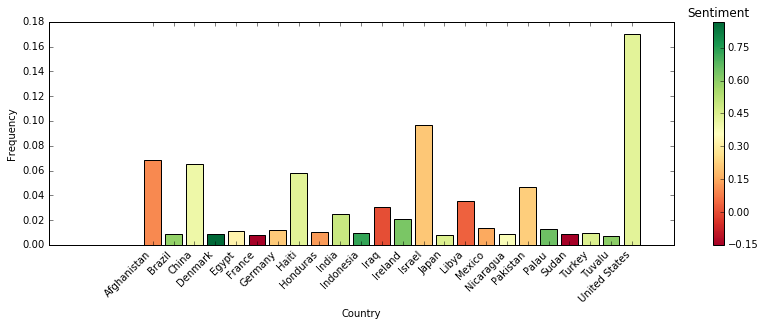

In [25]:
finaldf = sentiment_final[sentiment_final['Occurences']>0.007]

# Set up colors : red to green
plt.figure(figsize=(14, 4))
y = np.array(finaldf['Sentiment'])
colors = cm.RdYlGn(y / float(max(y)))
plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
plt.clf()
clb = plt.colorbar(plot)
clb.ax.set_title("Sentiment")

# Display bar plot : country frequency vs. country name, with color indicating polarity score
plt.bar(range(finaldf.shape[0]), finaldf['Occurences'], align='center', tick_label=finaldf.index, color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.show()